In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
#Performing API call to retrieve data
#printing number and name of the city while being processed
url="https://api.openweathermap.org/data/2.5/weather?"
lat=[]
lng=[]
temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
date=[]
for city in cities:
    try:
        query_url=f"{url}q={city}&units=imperial&appid={weather_api_key}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing city number {cities.index(city)+1}, name: {city}")
    except:
        lat.append(pd.NaT)
        lng.append(pd.NaT)
        temp.append(pd.NaT)
        humidity.append(pd.NaT)
        clouds.append(pd.NaT)
        wind.append(pd.NaT)
        country.append(pd.NaT)
        date.append(pd.NaT)
        print("City not found. Processing further...")
        
print("Data retrieval completed")

Processing city number 1, name: mataura
Processing city number 2, name: tasiilaq
Processing city number 3, name: chokurdakh
Processing city number 4, name: rikitea
Processing city number 5, name: hermanus
Processing city number 6, name: mezen
Processing city number 7, name: atuona
Processing city number 8, name: shushtar
City not found. Processing further...
Processing city number 10, name: tuktoyaktuk
Processing city number 11, name: qasigiannguit
City not found. Processing further...
Processing city number 13, name: albany
Processing city number 14, name: souillac
Processing city number 15, name: kodiak
Processing city number 16, name: avera
Processing city number 17, name: micheweni
Processing city number 18, name: khatanga
Processing city number 19, name: maneadero
Processing city number 20, name: chuy
Processing city number 21, name: kahului
Processing city number 22, name: cabedelo
Processing city number 23, name: yellowknife
Processing city number 24, name: puerto ayora
Processi

Processing city number 195, name: whitley bay
City not found. Processing further...
Processing city number 197, name: nexo
Processing city number 198, name: kruisfontein
Processing city number 199, name: zaysan
Processing city number 200, name: guhagar
Processing city number 201, name: egvekinot
Processing city number 202, name: clyde river
Processing city number 203, name: somotillo
Processing city number 204, name: petatlan
Processing city number 205, name: airai
Processing city number 206, name: ixtapa
Processing city number 207, name: tupik
Processing city number 208, name: kanakapura
Processing city number 209, name: cairns
Processing city number 210, name: lima
City not found. Processing further...
Processing city number 212, name: matara
Processing city number 213, name: port blair
Processing city number 214, name: tura
Processing city number 215, name: palmer
Processing city number 216, name: lahij
Processing city number 217, name: xingtai
Processing city number 218, name: kutu

Processing city number 386, name: arona
Processing city number 387, name: bilibino
Processing city number 388, name: lazarev
Processing city number 389, name: blythe
Processing city number 390, name: imbituba
Processing city number 391, name: kyakhta
Processing city number 392, name: santiago
Processing city number 393, name: alibag
Processing city number 394, name: buchanan
Processing city number 395, name: orlik
City not found. Processing further...
City not found. Processing further...
Processing city number 398, name: saint-francois
Processing city number 399, name: kut chap
Processing city number 400, name: uyar
Processing city number 401, name: lata
Processing city number 402, name: bago
Processing city number 403, name: shache
Processing city number 404, name: cayenne
Processing city number 405, name: nabire
Processing city number 406, name: nauta
Processing city number 407, name: sao borja
Processing city number 408, name: vardo
Processing city number 409, name: weihai
Processi

Processing city number 579, name: ekibastuz
Processing city number 580, name: bom jardim
Processing city number 581, name: taraz
Processing city number 582, name: goderich
Processing city number 583, name: kudahuvadhoo
Processing city number 584, name: snasa
Processing city number 585, name: caravelas
Processing city number 586, name: mahibadhoo
Processing city number 587, name: puerto colombia
Processing city number 588, name: okhotsk
Processing city number 589, name: dabhol
Processing city number 590, name: paungde
Processing city number 591, name: road town
Processing city number 592, name: laramie
Processing city number 593, name: ilulissat
Processing city number 594, name: hushitai
Processing city number 595, name: williamsport
Processing city number 596, name: victoria point
Processing city number 597, name: kendari
Processing city number 598, name: kijang
Processing city number 599, name: larap
City not found. Processing further...
City not found. Processing further...
City not 

In [4]:
#building data frame to display city data
cities_data=pd.DataFrame({"City": cities,
                         "Lat": lat,
                         "Lng": lng,
                         "Max temp": temp,
                         "Humidity": humidity,
                         "Cloudiness": clouds,
                         "Wind Speed": wind,
                         "Country": country,
                         "Date":date})
cities_data

City      Lat       Lng Max temp Humidity Cloudiness Wind Speed  \
0         mataura -46.1927  168.8643    55.47       88        100       5.82   
1        tasiilaq  65.6145  -37.6368    28.56       88        100      38.68   
2      chokurdakh  70.6333  147.9167   -40.54      100         59       2.95   
3         rikitea -23.1203 -134.9692    76.06       71         40         10   
4        hermanus -34.4187   19.2345     63.9       90        100      17.65   
..            ...      ...       ...      ...      ...        ...        ...   
604        cefalu  38.0386   14.0229    57.74       73         44       5.99   
605        muisne      0.6  -80.0333    76.15       80        100       9.93   
606  gunzenhausen     49.1     10.75    41.86       86        100      15.01   
607         praya  14.9215  -23.5087    73.94       78         75      20.71   
608     cartagena  10.3997  -75.5144    83.82       74         75       9.22   

    Country        Date  
0        NZ  1638655653  
1        GL  1638655653  
2        RU  1638655654  
3        PF  1638655654  
4        ZA  1638655655  
..      ...         ...  
604      IT  1638655850  
605      EC  1638655850  
606      DE  1638655850  
607      CV  1638655850  
608      CO  1638655851  

[609 rows x 9 columns]

In [5]:
#removing all NA rows
cleaned=cities_data.dropna(axis=0, how="any")
cleaned.head()

City      Lat       Lng Max temp Humidity Cloudiness Wind Speed  \
0     mataura -46.1927  168.8643    55.47       88        100       5.82   
1    tasiilaq  65.6145  -37.6368    28.56       88        100      38.68   
2  chokurdakh  70.6333  147.9167   -40.54      100         59       2.95   
3     rikitea -23.1203 -134.9692    76.06       71         40         10   
4    hermanus -34.4187   19.2345     63.9       90        100      17.65   

  Country        Date  
0      NZ  1638655653  
1      GL  1638655653  
2      RU  1638655654  
3      PF  1638655654  
4      ZA  1638655655

In [6]:
#saving raw data as csv
cleaned.to_csv("../output_data/Cities.csv")

In [7]:
#displaying statistical summary for the numerical columns
stats_summary=cleaned[["Lat","Lng","Max temp","Humidity","Cloudiness","Wind Speed"]].astype(float)
stats_summary=stats_summary.describe()
stats_summary

Lat         Lng    Max temp    Humidity  Cloudiness  Wind Speed
count  568.000000  568.000000  568.000000  568.000000  568.000000  568.000000
mean    19.944173   17.324240   51.977817   73.426056   59.931338    8.239243
std     33.080369   90.977236   29.929147   19.381208   37.715409    6.309510
min    -54.800000 -179.166700  -42.990000   12.000000    0.000000    0.000000
25%     -7.103475  -64.738100   31.892500   63.000000   20.000000    3.575000
50%     21.361950   22.311550   62.060000   77.000000   75.000000    6.990000
75%     48.633325   97.430700   76.082500   88.000000   98.000000   11.500000
max     78.218600  178.416700   93.340000  100.000000  100.000000   42.080000

In [8]:
#checking if there are cities with humidity greater than 100%
humidity_index=[]
for humidity in cleaned["Humidity"]:
    if humidity>100:
        humidity_index.append(index(humidity))
humidity_index

[]

<h1>Plotting the data</h1>

<h2>Temperature (F) vs. Latitude Plot</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

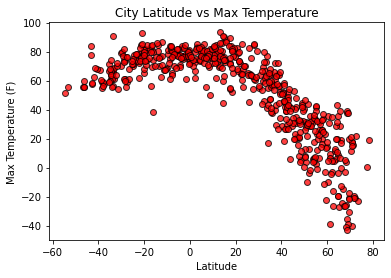

In [9]:
#creating scatter plot to showcase Temperature (F) vs. Latitude
x_axis=cleaned["Lat"]
max_temp=cleaned["Max temp"]
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, max_temp, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.savefig("../output_data/Latitude_vs_temp.png")
plt.show

The plot is analysing the correlation between the latitude and the maximum temperature in the cities. The temperature is displayed in Farenheit. 

------------------------------------------------------------------------------------

<h2>Humidity (%) vs. Latitude Plot</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

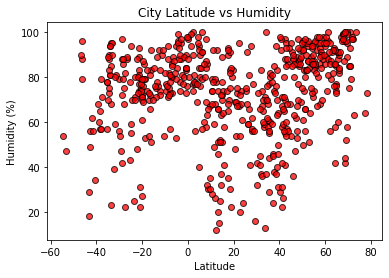

In [10]:
#creating scatter plot to showcase Humidity (%) vs. Latitude
x_axis=cleaned["Lat"]
humidity_pct=cleaned["Humidity"]
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, humidity_pct, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.savefig("../output_data/Latitude_vs_humidity.png")
plt.show

The plot is analysing the correlation between the latitude and the percentage of humidity in the cities. 

---------------------------------------------------------------------------

<h2>Cloudiness (%) vs. Latitude Plot</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

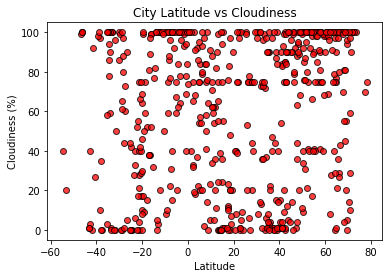

In [11]:
#creating scatter plot to showcase Cloudiness (%) vs. Latitude
x_axis=cleaned["Lat"]
cloudiness_pct=cleaned["Cloudiness"]
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, cloudiness_pct, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.savefig("../output_data/Latitude_vs_cloudiness.png")
plt.show

The plot is analysing the correlation between the latitude and the percentage of cloudiness in the cities.

------------------------------------------------------------------------------------

<h2>Wind Speed (mph) vs. Latitude Plot</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

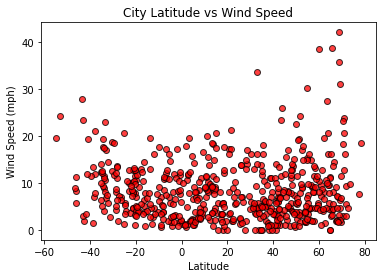

In [12]:
#creating scatter plot to showcase Wind Speed (mph) vs. Latitude
x_axis=cleaned["Lat"]
wind_speed=cleaned["Wind Speed"]
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, wind_speed, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.savefig("../output_data/Latitude_vs_wind_speed.png")
plt.show

The plot is analysing the correlation between the latitude and the wind speed in the cities. The speed of the wind is displayed in miles per hour.

--------------------------------------------------------------------

<h1>Linear Regression</h1>

In [13]:
#spliting the data frame into northern and southern depending on the latitude
northern=cleaned.loc[cleaned["Lat"]>=0,:]
southern=cleaned.loc[cleaned["Lat"]<0,:]

<h2>Temperature (F) vs. Latitude Plot</h2>

<h3>Northern Hemisphere</h3>

The r-squared is: 0.7537375134837127


<function matplotlib.pyplot.show(close=None, block=None)>

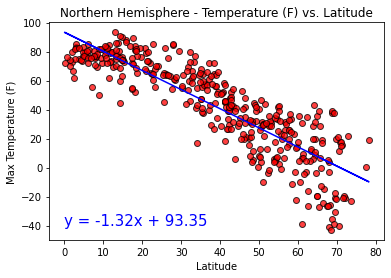

In [19]:
#plotting
x_axis=northern["Lat"]
max_temp=northern["Max temp"]
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), max_temp.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, max_temp, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern_Latitude_vs_max_temp.png")
plt.show

<h3>Southern Hemisphere</h3>

The r-squared is: 0.28707886269810823


<function matplotlib.pyplot.show(close=None, block=None)>

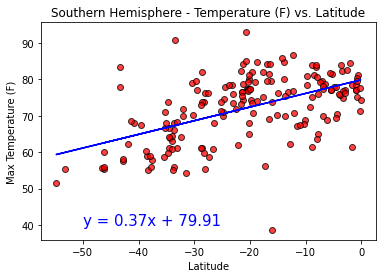

In [20]:
#plotting
x_axis=southern["Lat"]
max_temp=southern["Max temp"]
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), max_temp.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, max_temp, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/southern_Latitude_vs_max_temp.png")
plt.show

<h1>COMMENT</H1>

<H2>Humidity (%) vs. Latitude</h2>

<h3>Northern Hemisphere</h3>

The r-squared is: 0.09636031072247367


<function matplotlib.pyplot.show(close=None, block=None)>

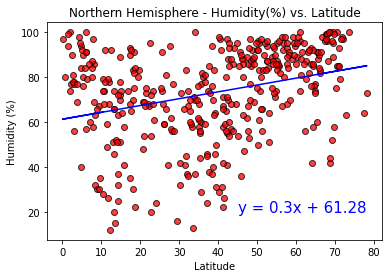

In [16]:
#plotting
x_axis=northern["Lat"]
humidity=northern["Humidity"]
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), humidity.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, humidity, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(45,20),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern_Latitude_vs_humidity.png")
plt.show

<h3> Southern Hemisphere</h3>

The r-squared is: 0.12248746888650267


<function matplotlib.pyplot.show(close=None, block=None)>

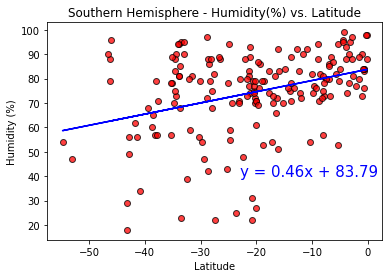

In [25]:
#plotting
x_axis=southern["Lat"]
humidity=southern["Humidity"]
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), humidity.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, humidity, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(-23,40),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/southern_Latitude_vs_humidity.png")
plt.show

<h1>COMMENTS</h1>

<h2>Cloudiness (%) vs. Latitude</h2>

<h3> Northern Hemisphere</h3>

The r-squared is: 0.06342526638593506


<function matplotlib.pyplot.show(close=None, block=None)>

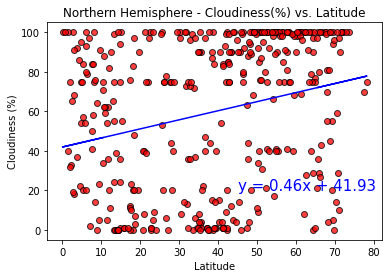

In [27]:
#plotting
x_axis=northern["Lat"]
cloudiness=northern["Cloudiness"]
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), cloudiness.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, cloudiness, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(45,20),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern_Latitude_vs_cloudiness.png")
plt.show

<h3>Southern Hemisphere</h3>

The r-squared is: 0.05152032563283237


<function matplotlib.pyplot.show(close=None, block=None)>

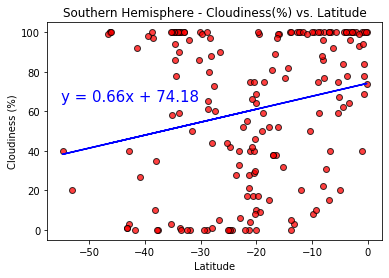

In [31]:
#plotting
x_axis=southern["Lat"]
cloudiness=southern["Cloudiness"]
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), cloudiness.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, cloudiness, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/southern_Latitude_vs_cloudiness.png")
plt.show

<h1>COMMENTS</h1>

<h2>Wind Speed (mph) vs. Latitude</h2>

<h3>Northern Hemisphere</h3>

The r-squared is: 0.020212630556082033


<function matplotlib.pyplot.show(close=None, block=None)>

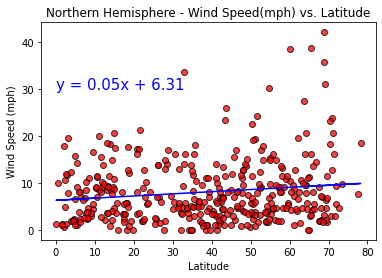

In [34]:
#plotting
x_axis=northern["Lat"]
wind_speed=northern["Wind Speed"]
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), wind_speed.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, wind_speed, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(0,30),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern_Latitude_vs_wind_speed.png")
plt.show

<h3>Southern Hemisphere</h3>

The r-squared is: 0.11978196357834212


<function matplotlib.pyplot.show(close=None, block=None)>

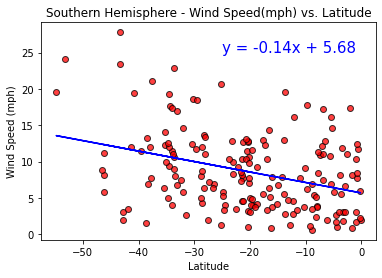

In [37]:
#plotting
x_axis=southern["Lat"]
wind_speed=southern["Wind Speed"]
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Performing a linear regression 
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis.astype(float), wind_speed.astype(float)) 
regress_values=x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, wind_speed, marker="o",facecolors="red",edgecolors="black",alpha=0.75)
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/southern_Latitude_vs_wind_speed.png")
plt.show

<h1>COMMENTS</h1>